# Analysis on Instacart Merged Dataset

## Contents
### Import libraries and data set
### Consider security implications and PII data
### Customer behavior in geographic areas
### Exclude low-activity customers
### Export new df
### Price range groupings
### Create dictionary for departments
### Frequency of product orders for departments
### Loyalty flag analysis
### Analyze demographics of customers
### Create customer profiling variable
### Visualization for profile variable distribution
### Aggregation on customer profile level
### Ordering habits by region
### Ordering habits and age/ status
### Crosstab on Departments
### Crosstab on Regions

## Import libaries and data set

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path to project folder
path = r'/Users/susanwang/Documents/CF_Tasks/Instacart Basket Analysis'

In [3]:
# import clean and merged data set 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
# check head
df.head()

,user_id,last_name,gender,state,age,n_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Esquivel,Female,Missouri,48,3,married,165665,518967,1,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Esquivel,Female,Missouri,48,3,married,165665,423547,2,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
# check shape
df.shape

(32404859, 31)

## Consider security implications and PII data

In [6]:
# view columns
df.columns

Index(['user_id', 'last_name', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days', 'frequency_flag',
       '_merge'],
      dtype='object')

The column 'last_name' would be a security concern, as that is personally identifiable information. Since the 'user_id' is enough to identify the customer, the 'last_name' column could be dropped to protect privacy.

In [7]:
# drop 'last_name' column
df = df.drop(columns=['last_name'])

In [8]:
# check data
df.head()

,user_id,gender,state,age,n_dependants,fam_status,income,order_id,order_number,orders_day_of_the_week,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Female,Missouri,48,3,married,165665,518967,1,2,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,3,married,165665,423547,2,2,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


## Customer behavior in geographic areas

States by regions according to https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States:

### Create a region column from the state column

In [9]:
# define the regions 
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# check count all 50 states and DC
len(northeast) + len(midwest) + len(south) + len(west)

51

In [11]:
# derive region column using loc 
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'


In [12]:
# check value counts
region_counts = df['region'].value_counts(dropna=False)

In [13]:
region_counts

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
# copy to excel report
region_counts.to_clipboard()

### Spending habits between different US Regions

In [15]:
# use crosstab to view frequency of spending by region, using normalize argument to normalize over each row
crosstab_region = pd.crosstab(df['region'], df['spending_flag'], dropna=False, normalize='index')

In [16]:
crosstab_region

spending_flag,High spender,Low spender
region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


In [17]:
# copy to excel report
crosstab_region.to_clipboard()

There is not a big difference in spending habits between different US regions. In general, low spenders account for about 98 % of all customers in each region, and about 2% for high spenders. The Midwest has a slightly higher proportion of high spenders.

## Exclude low-activity customers

Create exclusion flags for customers with less than 5 orders.

In [18]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days', 'frequency_flag', '_merge', 'region'],
      dtype='object')

In [19]:
df.shape

(32404859, 31)

In [21]:
# create exclusion flags from max_order column
df.loc[df['max_order'] < 5, 'exclusion'] = 'exclude'
df.loc[df['max_order'] >= 5, 'exclusion'] = 'include'

In [22]:
# check value counts
exclusion_counts = df['exclusion'].value_counts(dropna=False)

In [23]:
exclusion_counts

exclusion
include    30964564
exclude     1440295
Name: count, dtype: int64

In [24]:
# copy to excel report
exclusion_counts.to_clipboard()

In [25]:
df.shape

(32404859, 32)

In [26]:
# create new df that excludes the low-activity customers
df_new = df.loc[df['exclusion'] == 'include']

In [27]:
# check df_new head
df_new.head()

,user_id,gender,state,age,n_dependants,fam_status,income,order_id,order_number,orders_day_of_the_week,...,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion
0,26711,Female,Missouri,48,3,married,165665,518967,1,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,include
1,26711,Female,Missouri,48,3,married,165665,423547,2,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,include
2,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,include
3,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,include
4,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,include


In [28]:
# check df_new shape
df_new.shape

(30964564, 32)

## Export new df

In [30]:
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_final.pkl'))

## Price range groupings

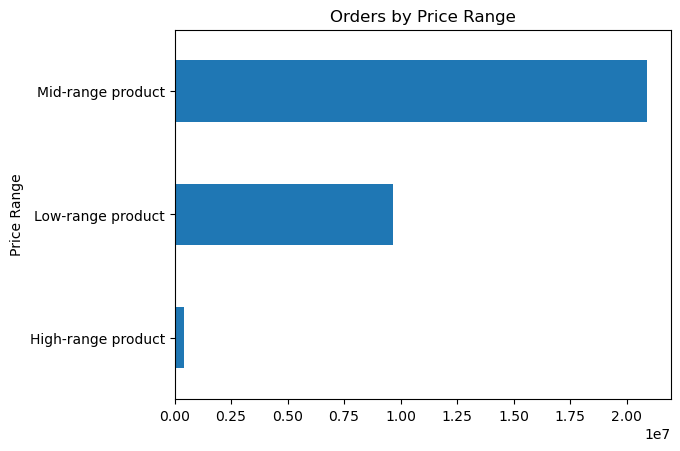

In [168]:
price_range_bar = df_new['price_range'].value_counts().sort_values(ascending=True).plot.barh(title='Orders by Price Range', ylabel='Price Range')

In [173]:
# export chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'), bbox_inches='tight')

## Create dictionary for departments

In [31]:
# import department csv
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=0)

In [32]:
df_dep

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [33]:
dep_dict = df_dep.to_dict('index')

In [34]:
print(dep_dict.get(6))

{'department': 'international'}


## Frequency of product orders for departments

In [98]:
dep_freq = df_new['department_id'].value_counts(dropna=False)

In [99]:
dep_freq

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [97]:
print(f'The most frequently ordered products are from {dep_dict.get(4)}, {dep_dict.get(16)}, and {dep_dict.get(19)}. The least ordered products are from {dep_dict.get(10)}, {dep_dict.get(2)} and {dep_dict.get(21)}')

The most frequently ordered products are from {'department': 'produce'}, {'department': 'dairy eggs'}, and {'department': 'snacks'}. The least ordered products are from {'department': 'bulk'}, {'department': 'other'} and {'department': 'missing'}


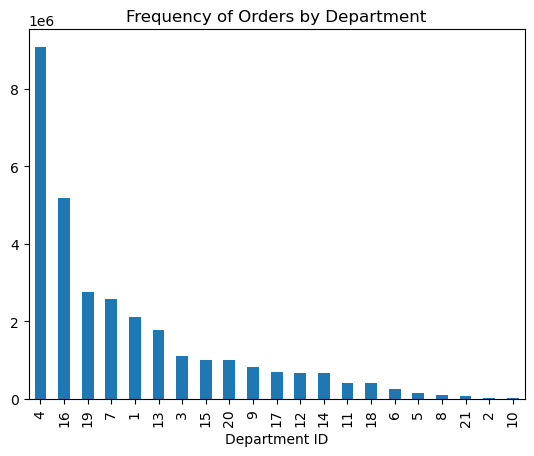

In [101]:
# create viz for frequency
dep_bar = df_new['department_id'].value_counts().plot.bar(title='Frequency of Orders by Department', xlabel='Department ID')

In [102]:
# export
dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_bar.png'))

## Loyalty flag analysis

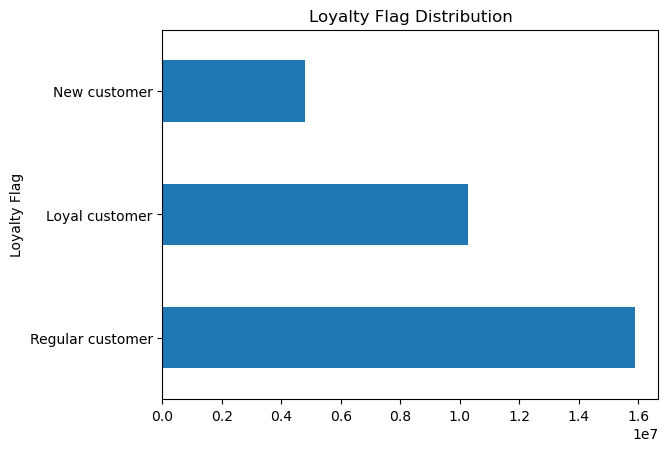

In [175]:
loyalty_bar =df_new['loyalty_flag'].value_counts().plot.barh(title='Loyalty Flag Distribution', ylabel='Loyalty Flag')

In [176]:
# export fig
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'), bbox_inches='tight')

## Analyize demographics of customers

In [196]:
# check stats of family status and age
fam_stats = df_new.groupby('fam_status').agg({'age': ['mean', 'max', 'min', 'count']})

In [197]:
fam_stats

age                  
                                       mean max min     count
fam_status                                                   
divorced/widowed                  70.510585  81  60   2645271
living with parents and siblings  19.502090  21  18   1481172
married                           51.495620  81  22  21743711
single                            38.600037  59  18   5094410

The family statistics clearly show that there is an age relationship to the family status. All "living with parents" are under 22, all "divorced" are over 60. All singles are under 60, which is saying there are no singles above the age of 60. All customers above 60 are either married or divorced/widowed.

In [202]:
# export table
fam_stats.to_clipboard()

In [199]:
fam_dep = df_new.groupby('fam_status')['n_dependants'].value_counts(dropna=False)

In [200]:
fam_dep

fam_status                        n_dependants
divorced/widowed                  0               2645271
living with parents and siblings  1                508045
                                  3                488469
                                  2                484658
married                           3               7284047
                                  2               7248603
                                  1               7211061
single                            0               5094410
Name: count, dtype: int64

All "living with parents and siblings" are under 21, yet they claim 1-3 dependants?

In [201]:
# export table
fam_dep.to_clipboard()

## Create customer profiling variable

In [141]:
df_new.shape

(30964564, 33)

Customer profiles will be based on age and number of dependants (family status has less to do with how many dependants they have)
From previous analysis (4.1 Visualization) we have learned that after age 40 there is a significant change in income, so I will use the age 40 as a factor in categorizing the groups.

In [203]:
# young parents
df_new.loc[(df_new['age'] <= 40) & (df_new['n_dependants'] >= 1), 'cust_profile'] = 'Young family'
df_new.loc[(df_new['age'] > 40) & (df_new['n_dependants'] >= 1), 'cust_profile'] = 'Older family'
df_new.loc[(df_new['age'] <= 40) & (df_new['n_dependants'] == 0), 'cust_profile'] = 'Single youth'
df_new.loc[(df_new['age'] > 40) & (df_new['n_dependants'] == 0), 'cust_profile'] = 'Single adult'

In [204]:
# check counts
profile_count = df_new['cust_profile'].value_counts(dropna=False)

In [205]:
profile_count

cust_profile
Older family    14856709
Young family     8368174
Single adult     4959422
Single youth     2780259
Name: count, dtype: int64

In [206]:
# copy to excel report
profile_count.to_clipboard()

In [207]:
df_new.shape

(30964564, 33)

## Visualization for profile variable distribution

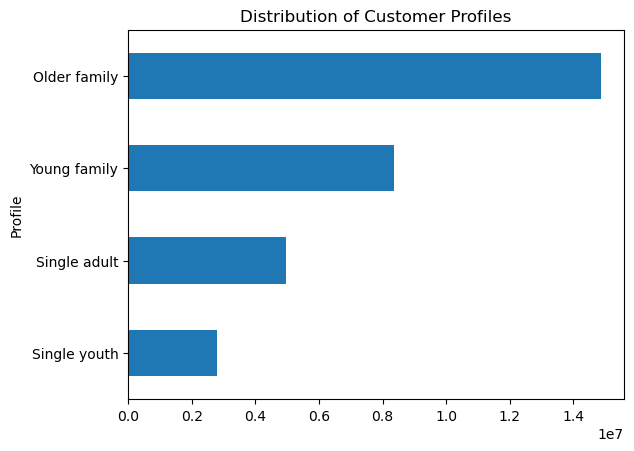

In [208]:
prof_bar = df_new['cust_profile'].value_counts().sort_values(ascending=True).plot.barh(title='Distribution of Customer Profiles', ylabel='Profile')

In [209]:
# export figure
prof_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_prof_bar.png'), bbox_inches='tight')

## Aggregation on customer profile level

In [210]:
# on usage and expenditure
cust_desc = df_new.groupby('cust_profile').agg({'max_order':['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [211]:
cust_desc

max_order            prices           
                   mean max min      mean   max  min
cust_profile                                        
Older family  34.198088  99   5  7.792906  25.0  1.0
Single adult  34.939428  99   5  7.794956  25.0  1.0
Single youth  34.205649  99   5  7.779906  25.0  1.0
Young family  34.598401  99   5  7.787441  25.0  1.0

In [213]:
# export to excel
cust_desc.to_clipboard()

The mean of max_order across all profiles are relatively the same, with the "single adult" group ordering slightly more times.
The mean of prices across all profiles are also relatively similar, with the older 'older family' and 'single adult' group spending slightly more.

## Ordering habits by region

In [216]:
region_freq = pd.crosstab(df_new['region'], df_new['frequency_flag'], dropna=False, normalize='index')

In [217]:
region_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,0.679665,0.095026,0.225310
Northeast,0.684574,0.090931,0.224495
South,0.686034,0.093880,0.220087
West,0.688048,0.093353,0.218599


In [185]:
# export
region_freq.to_clipboard()

## Ordering habits and age/ status

From a previous analysis (in 4.1 Visualizations), we have learned that there is no relationship between age and number of dependants (in other words, family status).

In [229]:
fam_price = pd.crosstab(df_new['fam_status'], df_new['price_range'], dropna=False, normalize='index')

In [230]:
fam_price

price_range,High-range product,Low-range product,Mid-range product
fam_status,,,
divorced/widowed,0.012904,0.312400,0.674696
living with parents and siblings,0.012826,0.311785,0.675389
married,0.012946,0.312449,0.674605
single,0.012430,0.312667,0.674903


In [231]:
# export table
fam_price.to_clipboard()

In [232]:
fam_freq = pd.crosstab(df_new['fam_status'], df_new['frequency_flag'], dropna=False, normalize='index')

In [233]:
fam_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
fam_status,,,
divorced/widowed,0.687689,0.092215,0.220096
living with parents and siblings,0.695742,0.093606,0.210652
married,0.684742,0.093812,0.221446
single,0.680356,0.092763,0.226881


In [234]:
# export table
fam_freq.to_clipboard()

## Crosstab on departments

In [218]:
# on types of orders
cust_dep = pd.crosstab(df_new['department_id'], df_new['cust_profile'], dropna=False, normalize='columns')

In [219]:
cust_dep

cust_profile,Older family,Single adult,Single youth,Young family
department_id,,,,
1,0.068585,0.069076,0.067177,0.068526
2,0.001100,0.001102,0.001168,0.001118
3,0.036216,0.036351,0.036369,0.036015
4,0.292775,0.293856,0.294248,0.293273
5,0.004516,0.004784,0.004713,0.004865
6,0.008198,0.008266,0.008441,0.008333
7,0.083680,0.083331,0.083469,0.081660
8,0.002989,0.003042,0.003063,0.002994
9,0.026576,0.026434,0.026328,0.026649


Babies products are dep 18. Alcohol is dep 5. We would expect that young parents would order more baby products and single adults and youths would order more alcholic products. 
It does not seem that the young parents are spending more on baby products, in fact they order less than the other groups. The most orders for alcohol products is surprisingly in the young family group. This group includes under 21 youths who live with family, but as they are under 21, they cannot purchase alcohol. So, the alcohol purchases must be attributed to young couples with children.
All profiles spend the most on 16 and 4, which are produce, dairy and eggs.

In [220]:
print(dep_dict.get(16))
print(dep_dict.get(4))

{'department': 'dairy eggs'}
{'department': 'produce'}


In [221]:
# export to excel
cust_dep.to_clipboard()

In [235]:
babies = df_new[df_new['department_id']==18]

In [237]:
babies.head()

,user_id,gender,state,age,n_dependants,fam_status,income,order_id,order_number,orders_day_of_the_week,...,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion,cust_profile
954,82820,Male,Virginia,26,2,married,32072,2005868,15,4,...,19,Regular customer,6.740984,Low spender,11.0,Regular customer,both,South,include,Young family
967,82820,Male,Virginia,26,2,married,32072,2096371,16,2,...,19,Regular customer,6.740984,Low spender,11.0,Regular customer,both,South,include,Young family
968,82820,Male,Virginia,26,2,married,32072,2096371,16,2,...,19,Regular customer,6.740984,Low spender,11.0,Regular customer,both,South,include,Young family
1626,516,Male,Colorado,51,2,married,146559,535981,10,5,...,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,both,West,include,Older family
2167,516,Male,Colorado,51,2,married,146559,703825,72,5,...,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,both,West,include,Older family


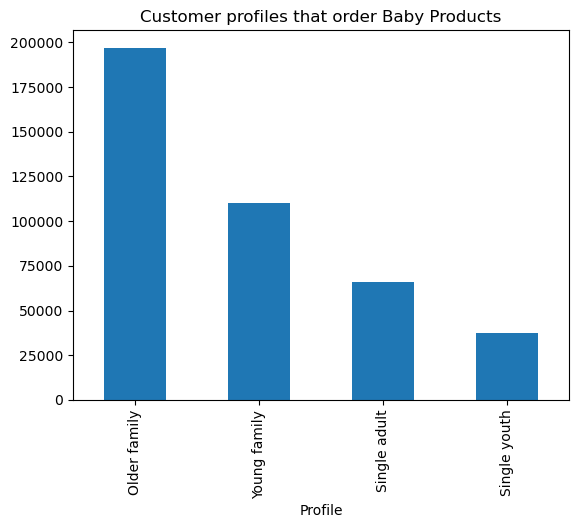

In [240]:
baby_bar = babies['cust_profile'].value_counts().plot.bar(title='Customer profiles that order Baby Products', xlabel='Profile')

In [241]:
# save figure
baby_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_prod_bar.png'), bbox_inches='tight')

In [242]:
alcohol = df_new[df_new['department_id']==5]

In [243]:
alcohol.head()

,user_id,gender,state,age,n_dependants,fam_status,income,order_id,order_number,orders_day_of_the_week,...,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion,cust_profile
216,125935,Female,Iowa,40,0,single,42049,250014,5,3,...,18,Regular customer,6.371795,Low spender,18.0,Regular customer,both,Midwest,include,Single youth
229,125935,Female,Iowa,40,0,single,42049,2509569,8,3,...,18,Regular customer,6.371795,Low spender,18.0,Regular customer,both,Midwest,include,Single youth
231,125935,Female,Iowa,40,0,single,42049,2509569,8,3,...,18,Regular customer,6.371795,Low spender,18.0,Regular customer,both,Midwest,include,Single youth
244,125935,Female,Iowa,40,0,single,42049,2817140,10,1,...,18,Regular customer,6.371795,Low spender,18.0,Regular customer,both,Midwest,include,Single youth
247,125935,Female,Iowa,40,0,single,42049,2817140,10,1,...,18,Regular customer,6.371795,Low spender,18.0,Regular customer,both,Midwest,include,Single youth


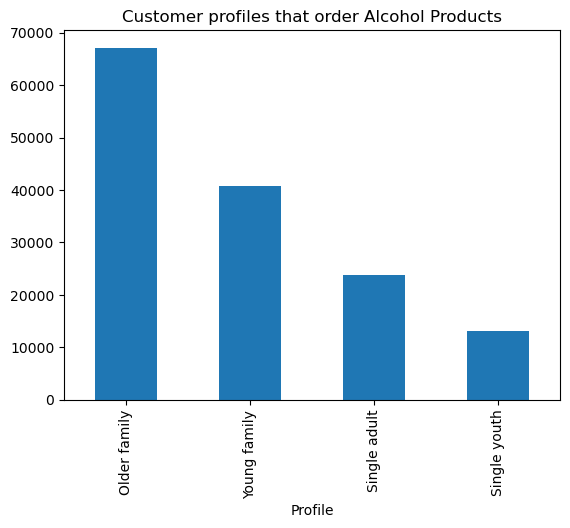

In [244]:
alc_bar = alcohol['cust_profile'].value_counts().plot.bar(title='Customer profiles that order Alcohol Products', xlabel='Profile')

Since this is also the same as the distribution of customer profiles, it does not tell us how the groups are ordering. There are always the most customers in the 'older family' group.

## Crosstab on Regions

In [222]:
cust_region = pd.crosstab(df_new['cust_profile'], df_new['region'], dropna=False, normalize='columns')

In [223]:
cust_region

region,Midwest,Northeast,South,West
cust_profile,,,,
Older family,0.481174,0.484198,0.475451,0.481155
Single adult,0.161985,0.158254,0.158437,0.162060
Single youth,0.089039,0.089607,0.091965,0.087769
Young family,0.267802,0.267941,0.274146,0.269017


In [224]:
# export
cust_region.to_clipboard()